In [1]:
import pandas as pd
import datetime
import yfinance as yf

## Data Gathering

In [2]:
start = datetime.datetime(2020,1,1)
end = datetime.datetime(2021,12,31) 

In [3]:
data = yf.download("BTC-GBP", start=start, end=end)

[*********************100%***********************]  1 of 1 completed


In [11]:
btc_raw = pd.DataFrame(data, columns={'Date':'Date','Open':'Open','High':'High','Low':'Low','Close':'Close','Adj Close':'Adj Close','Volume':'Volume'})

In [12]:
#btc_df = btc_raw[["Date","Close"]]

btc_df = btc_raw

In [13]:
btc_df

,Date,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,,
2020-01-01,NaN,5425.667969,5472.485840,5407.095215,5433.849121,5433.849121,14011191757
2020-01-02,NaN,5435.643066,5437.121094,5277.165039,5313.357910,5313.357910,15822688746
2020-01-03,NaN,5312.565918,5662.306641,5263.736328,5615.142090,5615.142090,21491142914
2020-01-04,NaN,5615.517578,5678.214355,5588.101562,5665.424805,5665.424805,14100590057
2020-01-05,NaN,5665.268066,5764.659668,5659.478027,5666.796875,5666.796875,15082067804
...,...,...,...,...,...,...,...
2021-12-27,NaN,37904.640625,38654.781250,37680.027344,37673.988281,37673.988281,18096121351
2021-12-28,NaN,37703.332031,37703.332031,35286.320312,35426.808594,35426.808594,24886742615
2021-12-29,NaN,35452.875000,35814.031250,34239.140625,34410.515625,34410.515625,22263231371


## Exploratory Data Analysis

<AxesSubplot:xlabel='Date'>

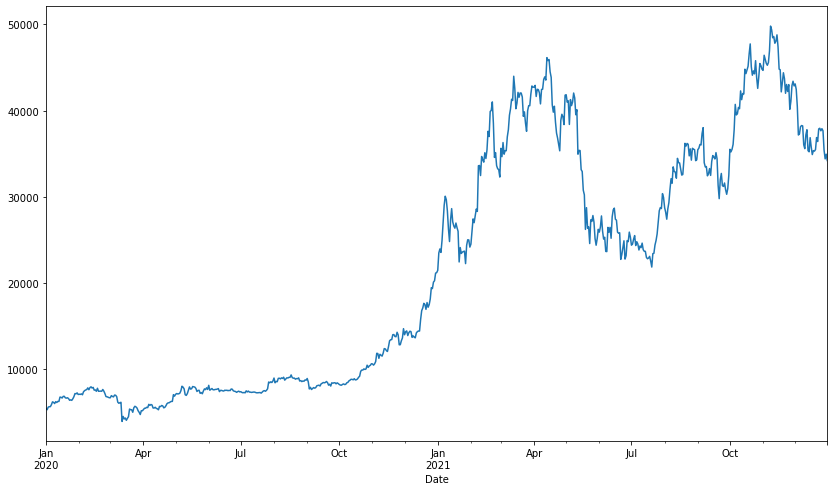

In [16]:
btc_df['Close'].plot(figsize=(14,8))

### Resampling

<AxesSubplot:xlabel='Date'>

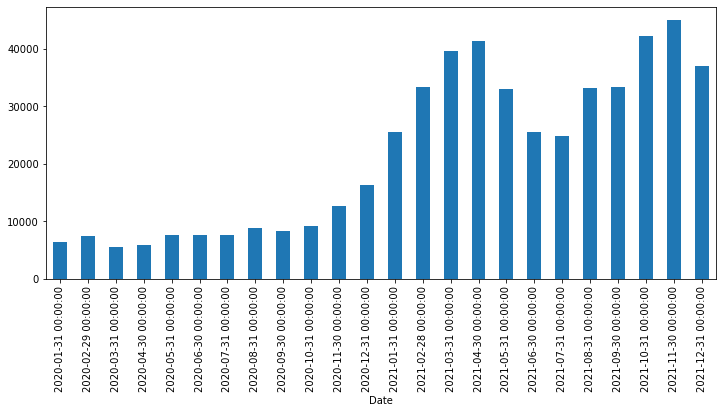

In [37]:
# Downsampling and performing aggregation
#Downsampling is to resample a time-series dataset to a wider time frame. For example, from minutes to hours, from days to years. The result will have a reduced number of rows and values can be aggregated with mean(), min(), max(), sum() etc.

btc_df['Close'].resample(rule='M').mean().plot(kind='bar',figsize=(12,5))

### Smoothening

In [38]:
# Simple moving average
# Mean Average Rolling Window
btc_df['Close 10 days rolling']=btc_df['Close'].rolling(10, min_periods=1).mean()
btc_df['Close 15 days rolling']=btc_df['Close'].rolling(15, min_periods=1).mean()
btc_df['Close 30 days rolling']=btc_df['Close'].rolling(30, min_periods=1).mean()

In [39]:
btc_df.head()

,Date,Open,High,Low,Close,Adj Close,Volume,Close 30 days rolling,Close 10 days rolling,Close 15 days rolling
Date,,,,,,,,,,
2020-01-01,NaN,5425.667969,5472.485840,5407.095215,5433.849121,5433.849121,14011191757,5433.849121,5433.849121,5433.849121
2020-01-02,NaN,5435.643066,5437.121094,5277.165039,5313.357910,5313.357910,15822688746,5373.603516,5373.603516,5373.603516
2020-01-03,NaN,5312.565918,5662.306641,5263.736328,5615.142090,5615.142090,21491142914,5454.116374,5454.116374,5454.116374
2020-01-04,NaN,5615.517578,5678.214355,5588.101562,5665.424805,5665.424805,14100590057,5506.943481,5506.943481,5506.943481
2020-01-05,NaN,5665.268066,5764.659668,5659.478027,5666.796875,5666.796875,15082067804,5538.914160,5538.914160,5538.914160


<AxesSubplot:xlabel='Date'>

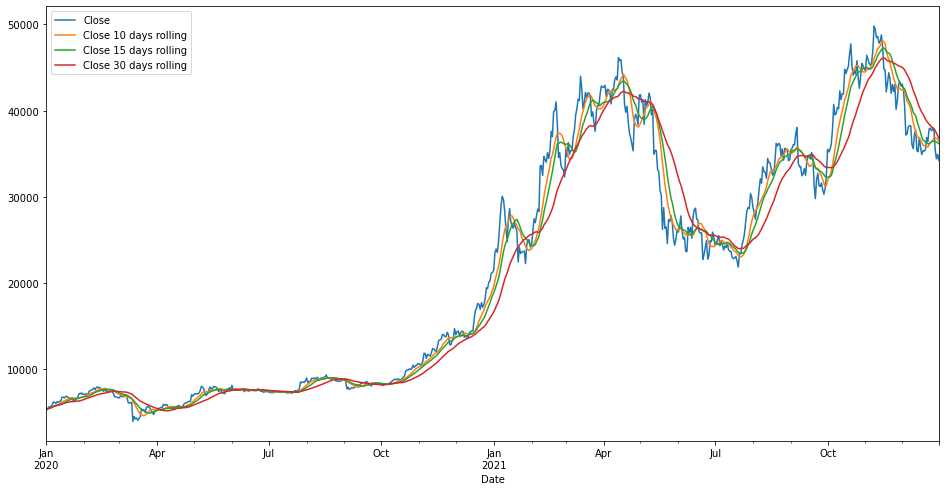

In [40]:
btc_df[['Close','Close 10 days rolling','Close 15 days rolling','Close 30 days rolling']].plot(figsize=(16,8))

### Cummulative moving average

In [41]:
btc_df['CMA']=btc_df['Close'].expanding().mean()

<AxesSubplot:xlabel='Date'>

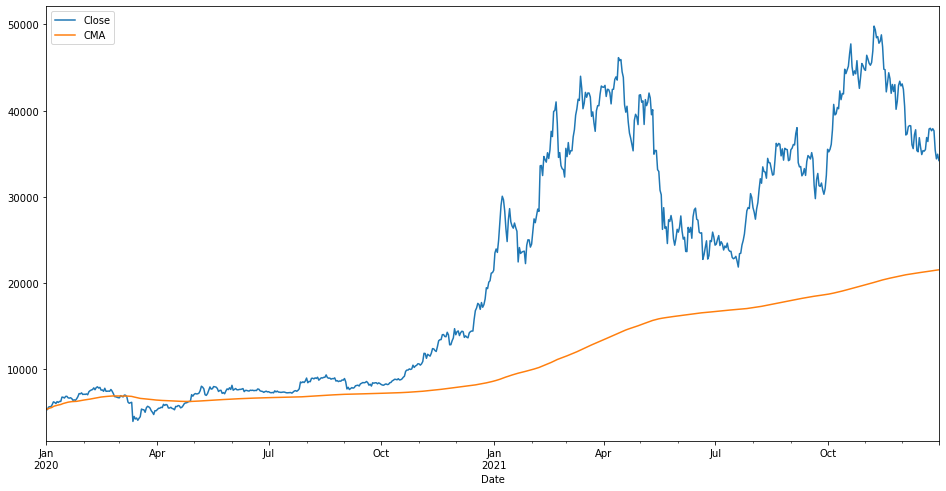

In [42]:
btc_df[['Close','CMA']].plot(figsize=(16,8))